# Import Pakage

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


# Geographical Bubble Plot

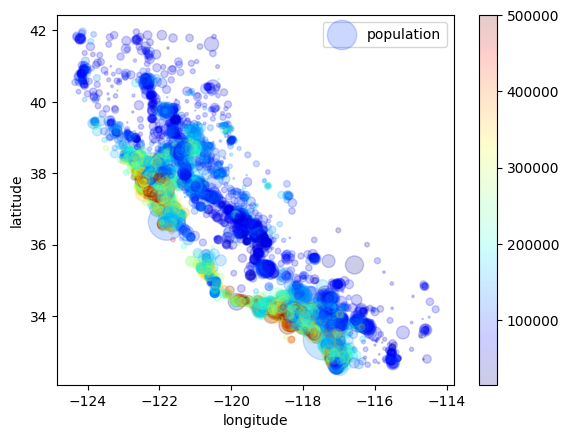

In [4]:
data = train_set.copy()
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2,
          s=data['population']/40,label='population',
          c=data['median_house_value'],cmap=plt.get_cmap('jet'))
plt.legend()
plt.show()

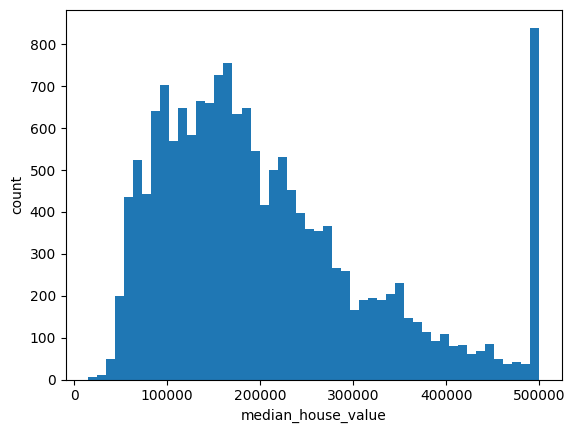

In [5]:
plt.hist(data['median_house_value'],bins=50)
plt.xlabel('median_house_value'); plt.ylabel('count')
plt.show()

In [6]:
corr_matrix = data.select_dtypes(include=[np.number]).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

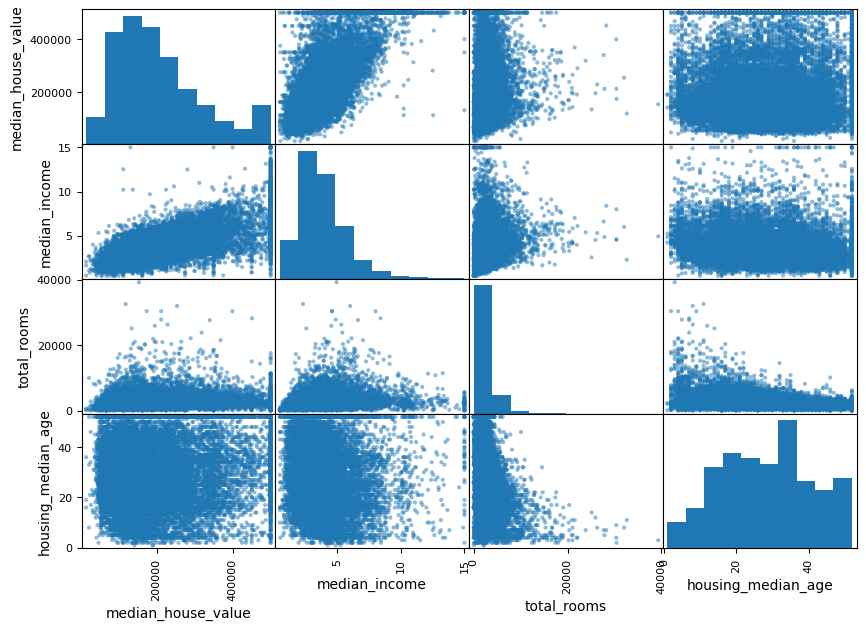

In [7]:
feauture = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(data[feauture],figsize=(10,7),)
plt.show()

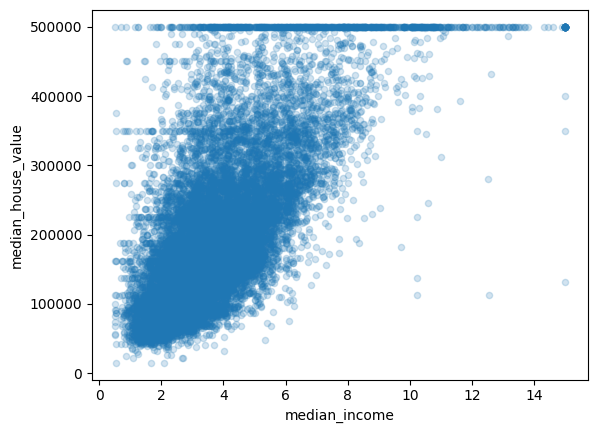

In [8]:
data.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.2)
plt.show()

In [9]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [10]:
data['bedrooms_per_rooms'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_households'] = data['population'] / data['households']
data['rooms_per_households'] = data['total_rooms'] / data['households']

In [11]:
data['income_per_households'] = data['median_income'] / data['households']

In [12]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_rooms,population_per_households,rooms_per_households,income_per_households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,0.200576,3.691814,5.017657,0.005232
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,0.232703,1.738095,4.473545,0.005043
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,0.174486,2.723214,5.645833,0.012370
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,0.258269,3.994366,4.002817,0.005472
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,0.180940,2.300000,6.268421,0.009353


# Corilation Matrix

In [13]:
corr_matrix = data.select_dtypes(include=[np.number]).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.690647
rooms_per_households         0.158485
total_rooms                  0.133989
housing_median_age           0.103706
households                   0.063714
income_per_households        0.057496
total_bedrooms               0.047980
population_per_households   -0.022030
population                  -0.026032
longitude                   -0.046349
latitude                    -0.142983
bedrooms_per_rooms          -0.257419
Name: median_house_value, dtype: float64

# Data Preprocessing

In [14]:
from sklearn.impute import SimpleImputer
df = train_set.copy()

df_label = df['median_house_value'].copy()

df = df.drop('median_house_value',axis=1)

df_num = df.drop('ocean_proximity',axis=1)

impute = SimpleImputer(missing_values=np.nan,strategy='median')
impute.fit(df_num)
X = impute.transform(df_num)

df_num_impute_tr = pd.DataFrame(X,columns=df_num.columns)
df_num_impute_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [15]:
df_num_impute_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [16]:
df_num_impute_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


# Custom Transformer

In [17]:
from sklearn.base import TransformerMixin,BaseEstimator
rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

class CombinedAttribute(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_households = x[:,rooms_ix] / x[:,households_ix]
        bedrooms_per_room = x[:,bedrooms_ix] / x[:,rooms_ix]
        population_per_household = x[:,population_ix] / x[:,households_ix]
        return np.c_[x,rooms_per_households,bedrooms_per_room,population_per_household]
    
custom = CombinedAttribute()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_impute_tr)
columns.append('rooms_per_households')
columns.append('bedrooms_per_room')
columns.append('population_per_household')
data_custom_tr.columns = columns

In [18]:
data_custom_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_per_room,population_per_household
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0.200576,3.691814
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0.232703,1.738095
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0.174486,2.723214
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0.258269,3.994366
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0.180940,2.300000


# StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_num_scaled = pd.DataFrame(scaler.fit_transform(data_custom_tr),columns=data_custom_tr.columns)
data_num_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_per_room,population_per_household
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,-0.211785,0.051376
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,0.342185,-0.117362
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.661658,-0.032280
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.783032,0.077507
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.550364,-0.068832
...,...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,0.290620,-1.064430,-0.005588
16508,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,0.600411,-0.483382,0.069722
16509,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.606759,0.999514,0.020306
16510,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,0.402175,-0.790862,0.007076


# OnehotEncoder

In [20]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False)
data_encoded_tmp = one_hot.fit_transform(df[['ocean_proximity']])
data_encoded = pd.DataFrame(data_encoded_tmp)
data_encoded.columns = one_hot.get_feature_names_out(['ocean_proximity'])

final = pd.concat([data_num_scaled,data_encoded],axis=1)
final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,-0.211785,0.051376,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,0.342185,-0.117362,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.661658,-0.032280,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.783032,0.077507,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.550364,-0.068832,0.0,1.0,0.0,0.0,0.0


In [21]:
list(final)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_households',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

# Create Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

class CombinedAttribute(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        rooms_per_households = x[:,rooms_ix] / x[:,households_ix]
        bedrooms_per_room = x[:,bedrooms_ix] / x[:,rooms_ix]
        population_per_household = x[:,population_ix] / x[:,households_ix]
        return np.c_[x,rooms_per_households,bedrooms_per_room,population_per_household]
    
class DataframeSelector():
    def __init__(self,attribute_name):
        self.attribute_name = attribute_name
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        return x[self.attribute_name].values

df = train_set.copy()
df_label = df['median_house_value'].copy()
df = df.drop('median_house_value',axis=1)

df_num = df.drop('ocean_proximity',axis=1)

num_attr = list(df_num)

cat_attr = ['ocean_proximity']
num_pipline = Pipeline([
    ('selector',DataframeSelector(num_attr)),
    ('std_scaler',StandardScaler()),
    ('combined',CombinedAttribute()),
    ('impute',SimpleImputer(missing_values=np.nan,strategy='median'))
])

cat_pipline = Pipeline([
    ('selcetor',DataframeSelector(cat_attr)),
    ('one_hot',OneHotEncoder(sparse_output=False))
])

full_pipline = FeatureUnion(transformer_list=[
    ('num_pipline',num_pipline),
    ('cat_pipline',cat_pipline)
])

housing_prepared = full_pipline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared,columns=['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_households',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN'])

In [23]:
housing_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,0.689270,0.949041,2.379257,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,0.506368,1.742891,-0.147169,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.795884,1.445506,1.044968,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,1.475327,0.728964,0.019534,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.379618,2.145763,1.542652,0.0,1.0,0.0,0.0,0.0


In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df,df_label)

sample_data = housing_prepared_df.iloc[:4]
print(f'prediction : {lin_reg.predict(sample_data)}')

sample_label = df_label.iloc[:4]
print(f'label : {list(sample_label)}')

prediction : [188617.71281003 290288.77051842 250954.34119968 146868.38778973]
label : [103000.0, 382100.0, 172600.0, 93400.0]


In [25]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared_df)

lin_mse = mean_squared_error(df_label,housing_prediction)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68422.6882966476


In [26]:
from sklearn.tree import DecisionTreeRegressor
ds_tree = DecisionTreeRegressor()
ds_tree.fit(housing_prepared_df,df_label)

housing_prediction = ds_tree.predict(housing_prepared_df)
ds_tree_mse = mean_squared_error(df_label,housing_prediction)
ds_tree_rmse = np.sqrt(ds_tree_mse)

print(ds_tree_rmse)

0.0


# CrossValidation

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ds_tree,housing_prepared_df,df_label,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_name(score,model_name):
    print(f'model name : {model_name}')
    print('Scores',score)
    print('Mean_Score',score.mean())
    print('Std_Score',score.std())

display_name(tree_rmse_scores,'DesicionTree')


model name : DesicionTree
Scores [67352.44033117 71743.64555585 71771.09260882 70152.53686351
 70857.24362483 67381.0333911  66153.81039545 71042.72817346
 71141.9948351  70394.39826186]
Mean_Score 69799.09240411334
Std_Score 1942.6858049715506


# CrossValidiation - LinearRegressor

In [28]:
scores = cross_val_score(lin_reg,housing_prepared_df,df_label,scoring='neg_mean_squared_error',cv=10)
lin_reg_scores = np.sqrt(-scores)
display_name(lin_reg_scores,'LinearRegression')

model name : LinearRegression
Scores [66059.71654598 71688.27569367 68147.64386126 66830.06289023
 69380.9330889  65626.58028662 65849.75280983 69977.48798717
 73117.14111337 69689.44133259]
Mean_Score 68636.70356096159
Std_Score 2445.7755215900115


# RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(max_features=8,n_estimators=30,max_depth=14)
forest_reg.fit(housing_prepared_df,df_label)

forest_scores = cross_val_score(forest_reg,housing_prepared_df,df_label,scoring='neg_mean_squared_error',cv=10)
forest_scores_rmse = np.sqrt(-forest_scores)
display_name(forest_scores_rmse,'RandomForest')

model name : RandomForest
Scores [48013.43135165 52432.82008562 49355.94639629 51552.90234765
 51721.69737962 47904.75933392 47826.86944384 51428.05222549
 50199.46549255 51461.30739816]
Mean_Score 50189.72514547898
Std_Score 1691.8254544815134


# Predict Train Error

In [30]:
train_pred = forest_reg.predict(housing_prepared_df)
train_rmse = np.sqrt(mean_squared_error(df_label,train_pred))
print('Train error',train_rmse)

Train error 73988.74975136104


In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[3,4,6,10,30],'max_features':[2,6,8,15],'max_depth':[2,4,6,8,10,12,13,14]}]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared_df,df_label)

print('best paramets : ',grid_search.best_params_)
print('best estimators :',grid_search.best_estimator_)

best paramets :  {'max_depth': 14, 'max_features': 8, 'n_estimators': 30}
best estimators : RandomForestRegressor(max_depth=14, max_features=8, n_estimators=30)


In [46]:
result = grid_search.cv_results_
for mean_score,params in zip(result['mean_test_score'],result['params']):
    print(np.sqrt(-mean_score),params)

103618.08359858218 {'max_depth': 2, 'max_features': 2, 'n_estimators': 3}
97969.22346000139 {'max_depth': 2, 'max_features': 2, 'n_estimators': 4}
100025.24631720412 {'max_depth': 2, 'max_features': 2, 'n_estimators': 6}
97129.76629514294 {'max_depth': 2, 'max_features': 2, 'n_estimators': 10}
98544.06236288098 {'max_depth': 2, 'max_features': 2, 'n_estimators': 30}
86510.52063163902 {'max_depth': 2, 'max_features': 6, 'n_estimators': 3}
89299.63758406136 {'max_depth': 2, 'max_features': 6, 'n_estimators': 4}
86569.57959241665 {'max_depth': 2, 'max_features': 6, 'n_estimators': 6}
84619.93435892792 {'max_depth': 2, 'max_features': 6, 'n_estimators': 10}
85356.97626998297 {'max_depth': 2, 'max_features': 6, 'n_estimators': 30}
83138.0527480747 {'max_depth': 2, 'max_features': 8, 'n_estimators': 3}
82785.12901677167 {'max_depth': 2, 'max_features': 8, 'n_estimators': 4}
82820.90237129638 {'max_depth': 2, 'max_features': 8, 'n_estimators': 6}
81279.22038305648 {'max_depth': 2, 'max_featur

# Test Final Model

In [49]:
final_model = grid_search.best_estimator_
x = test_set.drop('median_house_value',axis=1)
y = test_set['median_house_value'].copy()
x_prepared = full_pipline.transform(x)
final_prediction = final_model.predict(x_prepared)
final_mse = mean_squared_error(y,final_prediction)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

50316.39824047589


c:\Users\padideh\Desktop\housing_project\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
